In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df1_house=pd.read_csv('houses_to_rent.csv',index_col=0)

In [58]:
df1_house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [59]:
df1_house['total']=df1_house['total'].replace({',':''},regex=True)
df1_house['total']=df1_house['total'].replace({'R':''},regex=True)
df1_house['total']=df1_house['total'].replace({'$':''},regex=True)

In [60]:
df1_house['fire insurance']=df1_house['fire insurance'].replace({',':''},regex=True)
df1_house['fire insurance']=df1_house['fire insurance'].replace({'R':''},regex=True)

df1_house['property tax']=df1_house['property tax'].replace({',':''},regex=True)
df1_house['property tax']=df1_house['property tax'].replace({'R':''},regex=True)


df1_house['rent amount']=df1_house['rent amount'].replace({',':''},regex=True)
df1_house['rent amount']=df1_house['rent amount'].replace({'R':''},regex=True)


df1_house['hoa']=df1_house['hoa'].replace({',':''},regex=True)
df1_house['hoa']=df1_house['hoa'].replace({'R':''},regex=True)

df1_house['total']=[x.strip('$') for x in df1_house.total]
df1_house['property tax']=[x.strip('$') for x in df1_house['property tax']]
df1_house['rent amount']=[x.strip('$') for x in df1_house['rent amount']]
df1_house['hoa']=[x.strip('$') for x in df1_house.hoa]
df1_house['fire insurance']=[x.strip('$') for x in df1_house['fire insurance']]
df1_house['hoa']=df1_house['hoa'].replace({'Incluso':'0'},regex=True)
df1_house['hoa']=df1_house['hoa'].replace({'Sem info':'0'},regex=True)
df1_house['property tax']=df1_house['property tax'].replace({'Incluso':'0'},regex=True)
df1_house['floor']=df1_house['floor'].replace({'-':'0'})

In [61]:
df1_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


In [62]:
for i in df1_house[['rent amount','fire insurance','total','hoa','property tax']].columns:
    df1_house[i]=df1_house[i].astype(float)

In [63]:
df1_house.describe()

,city,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,1088.426480,4395.844408,490.333388,58.204276,6033.194572
std,0.343535,375.559485,1.129665,1.438860,1.611909,3981.357627,3576.668946,6212.564538,49.313441,8751.347700
min,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,24.500000,1800.000000,33.000000,23.000000,2451.500000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,650.000000,3111.000000,145.000000,41.000000,4128.500000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,1436.000000,5952.500000,458.000000,77.000000,8074.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [16]:
# df1_house.drop(['area'],axis=1)

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1_house['animal']=le.fit_transform(df1_house['animal'])
df1_house['furniture']=le.fit_transform(df1_house['furniture'])
# df1_house['floor']=le.fit_transform(df1_house['floor'])

In [65]:
df1_house.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,0,0,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10,0,1,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3,0,0,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12,0,1,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,0,1,1,0.0,1200.0,41.0,16.0,1257.0


In [66]:
df1_house.shape

(6080, 13)

In [67]:
y=np.log(df1_house.total)

In [68]:
df1_house.animal.unique()

array([0, 1], dtype=int64)

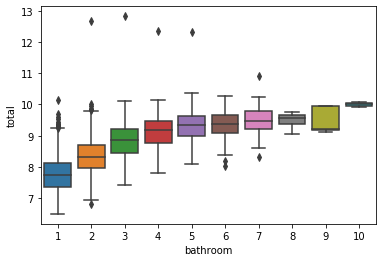

In [69]:
sns.boxplot(df1_house.bathroom,y)
plt.show()

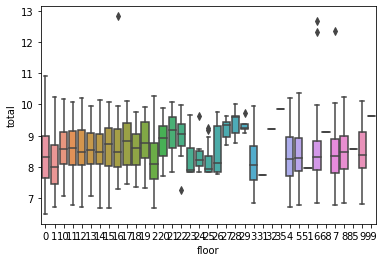

In [70]:
sns.boxplot(df1_house.floor,y)
plt.show()

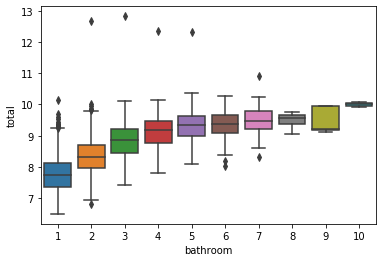

In [71]:
sns.boxplot(df1_house.bathroom,y)
plt.show()

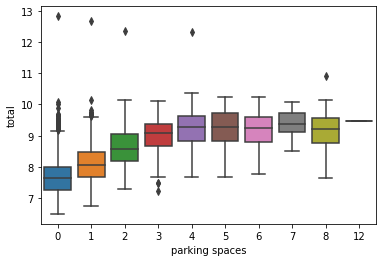

In [25]:
sns.boxplot(df1_house['parking spaces'],y)
plt.show()

In [72]:
df1_house['floor'].unique()

array(['0', '10', '3', '12', '2', '16', '6', '4', '1', '7', '13', '9',
       '14', '5', '8', '15', '11', '19', '20', '24', '23', '17', '18',
       '22', '27', '85', '28', '25', '29', '35', '21', '31', '99', '26',
       '68', '32', '51'], dtype=object)

In [73]:
df1_house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,0,0,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10,0,1,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3,0,0,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12,0,1,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,0,1,1,0.0,1200.0,41.0,16.0,1257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,0,1,420.0,1150.0,0.0,15.0,1585.0
6076,1,84,2,2,1,16,1,0,768.0,2900.0,63.0,37.0,3768.0
6077,0,48,1,1,0,13,0,1,250.0,950.0,42.0,13.0,1255.0
6078,1,160,3,2,2,0,1,1,0.0,3500.0,250.0,53.0,3803.0


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
lr=LinearRegression()

In [76]:
X=df1_house.drop(['total'],axis=1)
y=df1_house.total

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [84]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predict=lr.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error,r2_score

In [87]:
mean_squared_error(y_test,predict)

28.906840475762518

In [88]:
r2_score(y_test,predict)

0.999998752037494